In [2]:
import numpy as np
import pandas as pd
import math
import scipy.integrate
import scipy.optimize
import matplotlib.pyplot as plt

### Basic

In [3]:
def sir(x,a,k):
    return -x+a*np.log(x)+k #a = N*gamma/beta, k = I0 + S0 - gamma * N / beta * log(S0)

In [4]:
x = np.linspace(.01,1000,5000)
a, k =10,20
y = sir(x,a,k)

Text(0, 0.5, 'I')

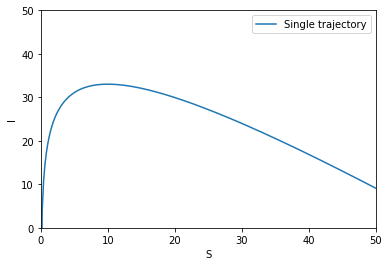

In [5]:
plt.plot(x,y,label="Single trajectory")
plt.legend()
plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel("S")
plt.ylabel("I")


In [6]:
def sir_phase_portr(ab, t, beta, gamma, n):
    """Right hand side for toggle ODEs."""
    a, b = ab #a==S, b == I 
    return np.array([-beta*a*b/n,
                     beta*a*b/n-gamma*b])

In [7]:
### nullcline
def plot_null_clines_toggle(ax, a_range, b_range, beta, gamma, n, 
                            colors=['#1f77b4', '#1f77b4'], lw=3):
    """Add nullclines to ax."""

    ncb_a = np.linspace(a_range[0], a_range[1], 200)
    ncb_b = np.full(len(ncb_a),gamma*n/beta)

    # Plot
    ax.plot(ncb_b, ncb_a, lw=lw, color='orangered',ls='--',label=("Nullcline"))
    ax.legend(fontsize=15)
    return ax

def plot_flow_field(ax, f, u_range, v_range, args=(), n_grid=100):
    """
    Plots the flow field with line thickness proportional to speed.
    
    Parameters
    ----------
    ax : Matplotlib Axis instance
        Axis on which to make the plot
    f : function for form f(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    u_range : array_like, shape (2,)
        Range of values for u-axis.
    v_range : array_like, shape (2,)
        Range of values for v-axis.
    args : tuple, default ()
        Additional arguments to be passed to f
    n_grid : int, default 100
        Number of grid points to use in computing
        derivatives on phase portrait.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    
    # Set up u,v space
    u = np.linspace(u_range[0], u_range[1], n_grid)
    v = np.linspace(v_range[0], v_range[1], n_grid)
    uu, vv = np.meshgrid(u, v)

    # Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = f(np.array([uu[i,j], vv[i,j]]), None, *args)

    # Compute speed
    speed = np.sqrt(u_vel**2 + v_vel**2)

    # Make linewidths proportional to speed,
    # with minimal line width of 0.5 and max of 3
    lw = 0.5 + 2.5 * speed / speed.max()

    # Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw, arrowsize=1.2, 
                  density=1.2, color='royalblue')
    ax = plot_null_clines_toggle(ax, [u_range[0], u_range[1]], [v_range[0], v_range[1]], beta, gamma, n)
    ax.legend(fontsize=15)
    return ax



In [8]:
n = 1
R0 = 2
gamma = 1
beta = gamma*R0
args = (beta, gamma, n)

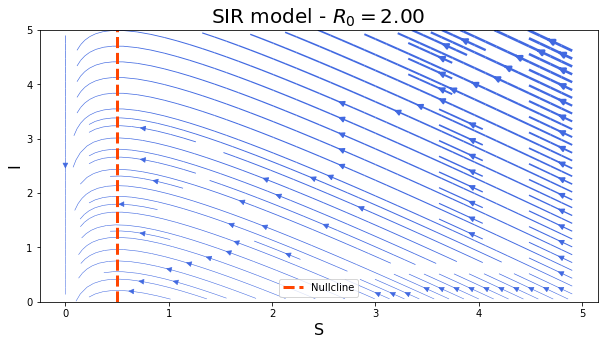

In [9]:
#phase portrait
fig, ax = plt.subplots(1, 1,figsize=[10,5])
ax.set_title("SIR model - $R_{0} = %.2f$" %(R0),fontsize=20)
ax.set_xlabel('S',fontsize=16)
ax.set_ylabel('I',fontsize=16)
args = [beta,gamma,n] #args=[beta,gamma,n]
ax = plot_flow_field(ax, sir_phase_portr, (0, 5), (0, 5), args=args) 
ax.legend()
plt.show()


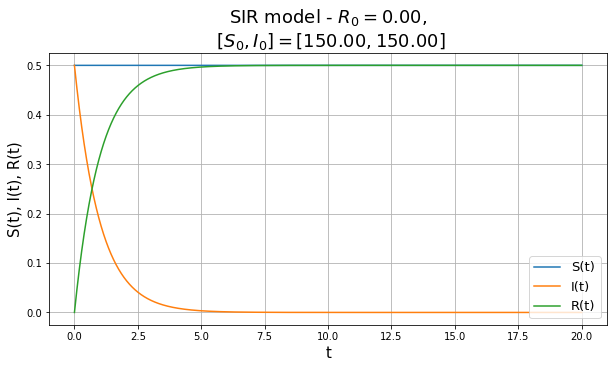

3.0706162614311037e-07


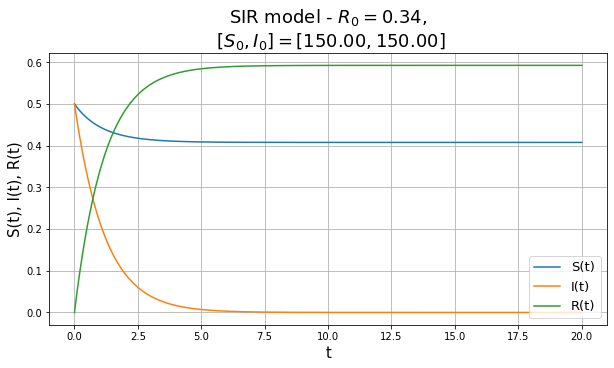

5.327331524881423e-06


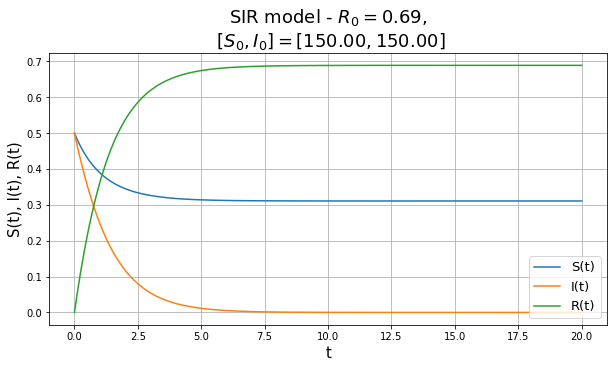

2.6222735336427095e-05


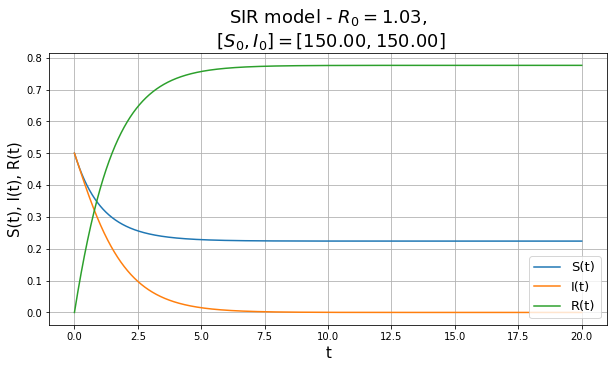

4.423224602889814e-05


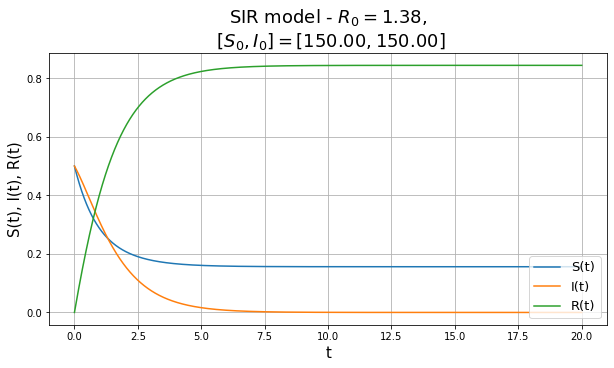

3.805105075973154e-05


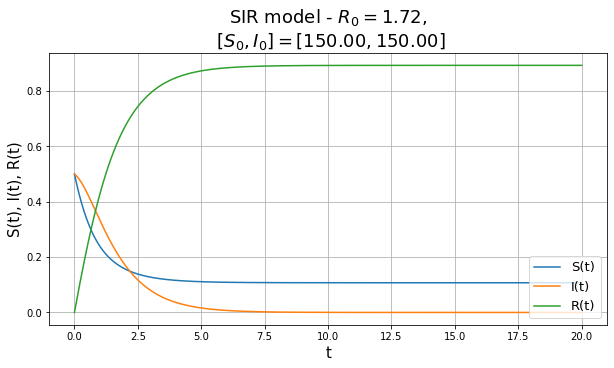

2.3982191756980898e-05


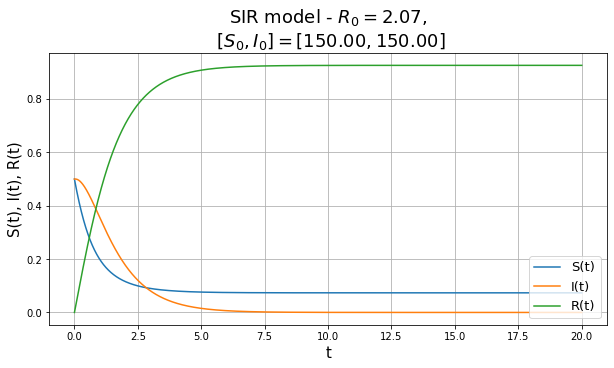

1.3821088460072011e-05


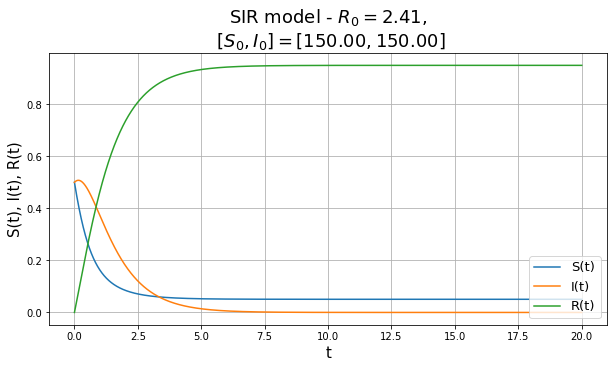

8.111686825738675e-06


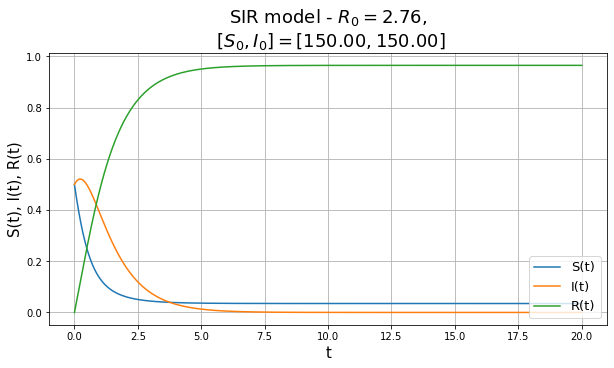

5.061988439830857e-06


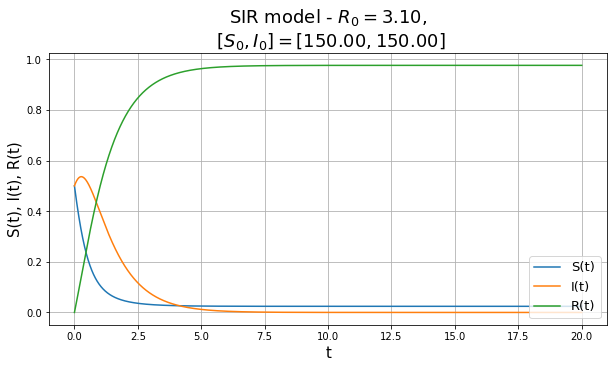

3.3971718983444152e-06


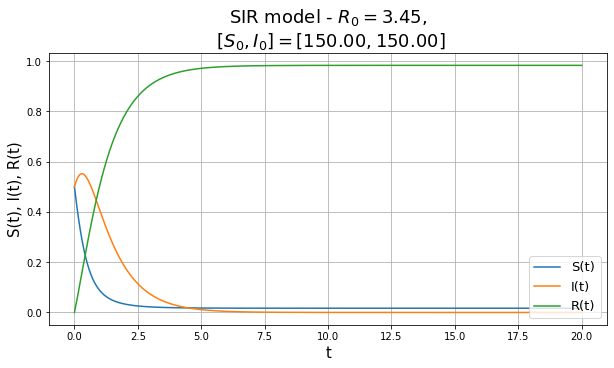

2.446680794317381e-06


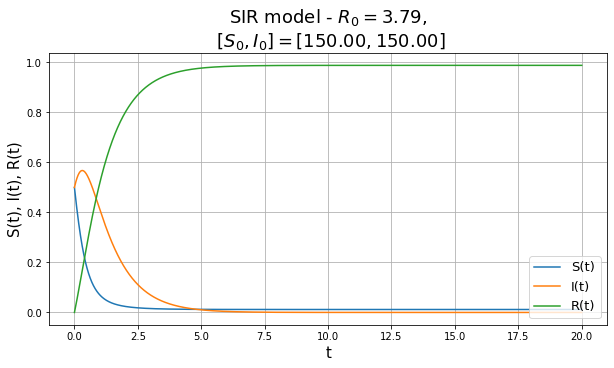

1.8756760946492105e-06


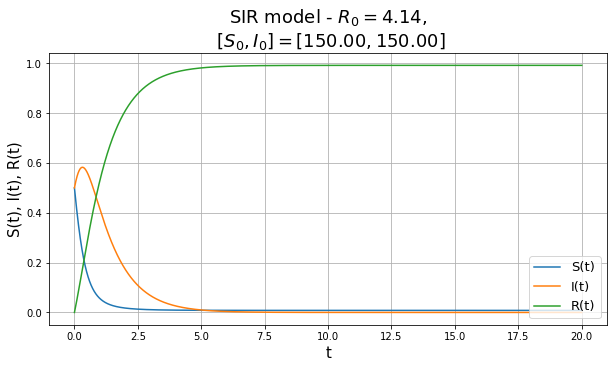

1.515230031496217e-06


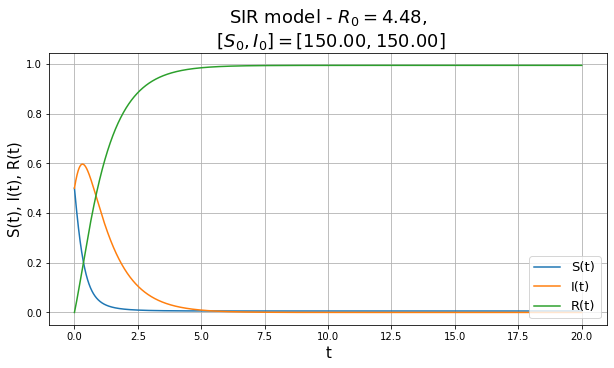

1.2775605992555754e-06


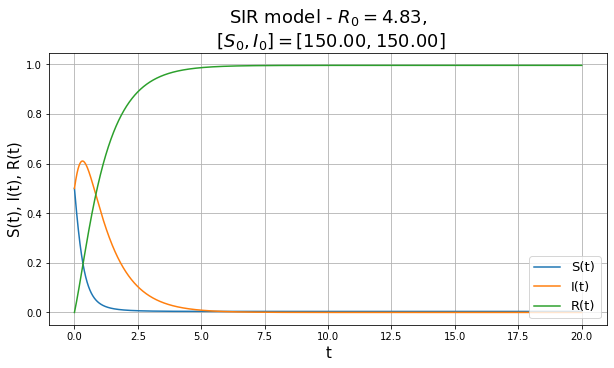

1.1184111664574599e-06


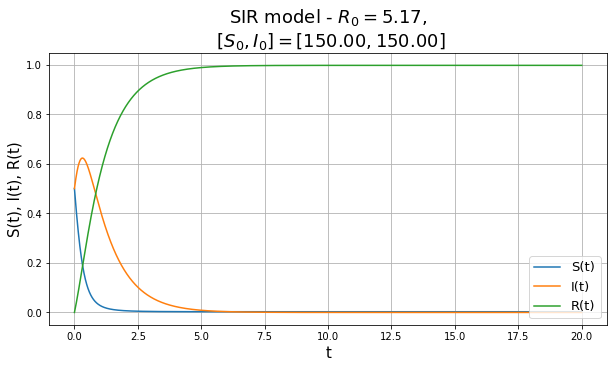

1.0065475795369646e-06


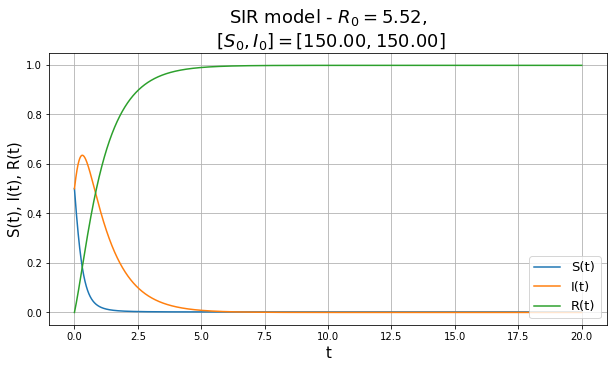

9.255538870518949e-07


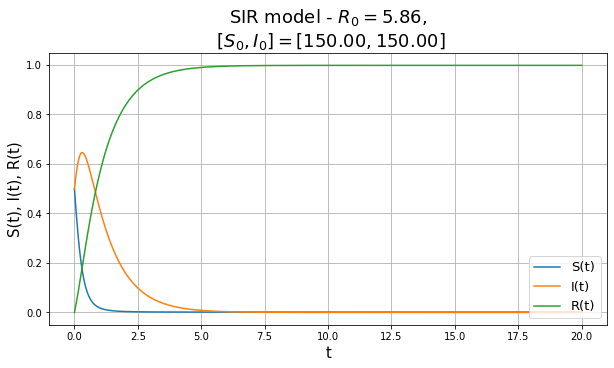

8.649721397048714e-07


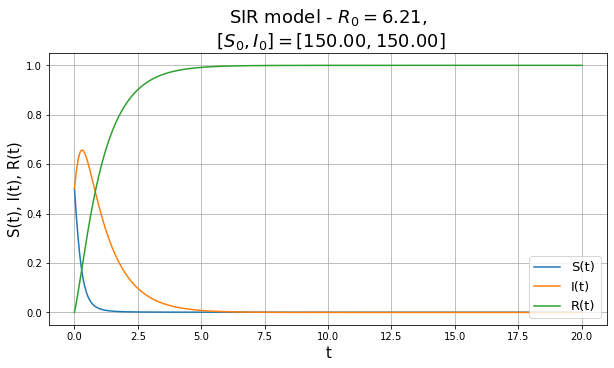

8.211228107096991e-07


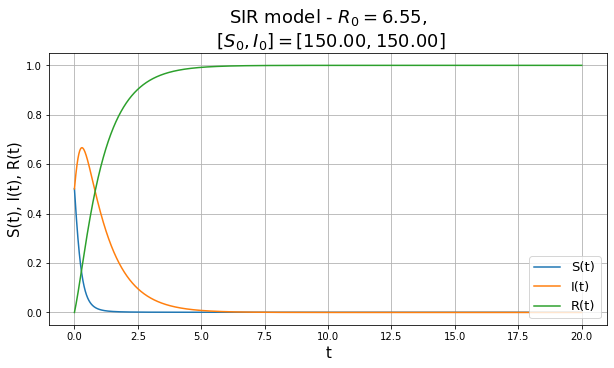

7.884956072491849e-07


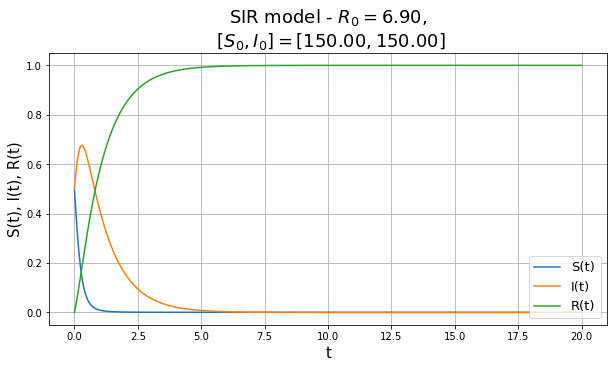

7.633963942348789e-07


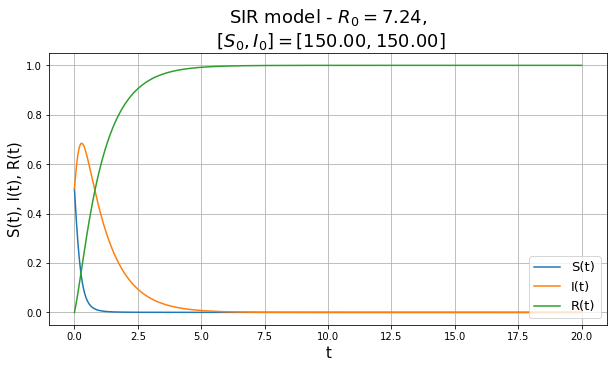

7.430472454497867e-07


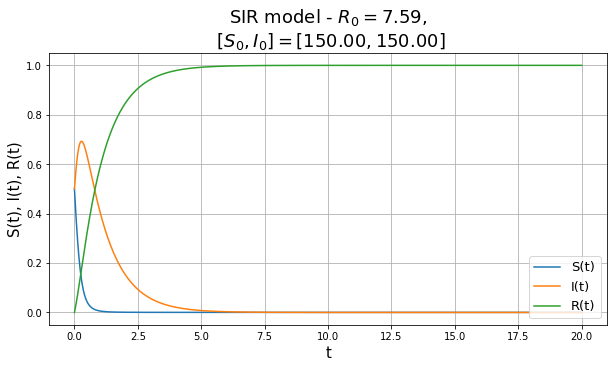

7.282478972208131e-07


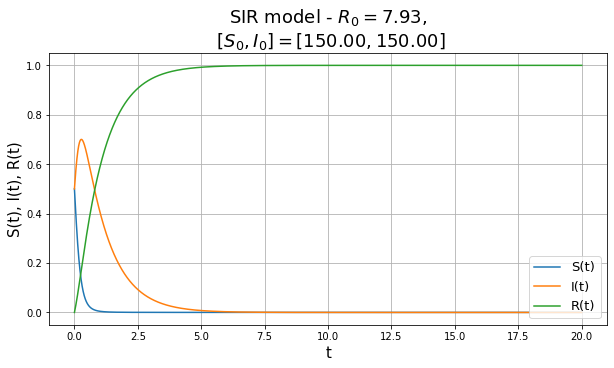

7.160857874928291e-07


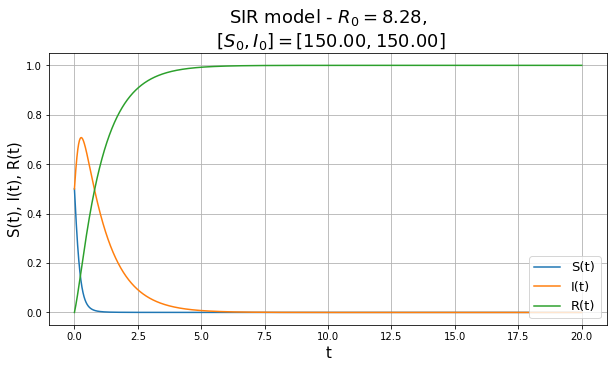

7.080569679465511e-07


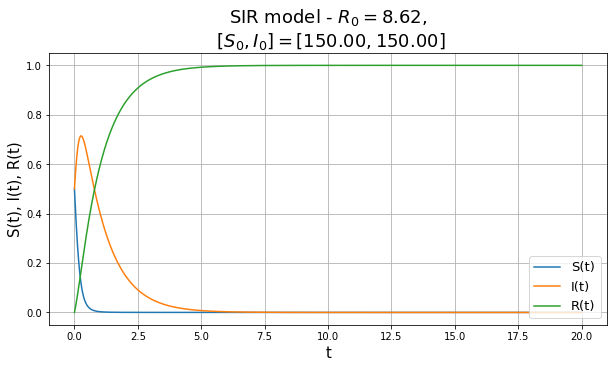

7.001625674565448e-07


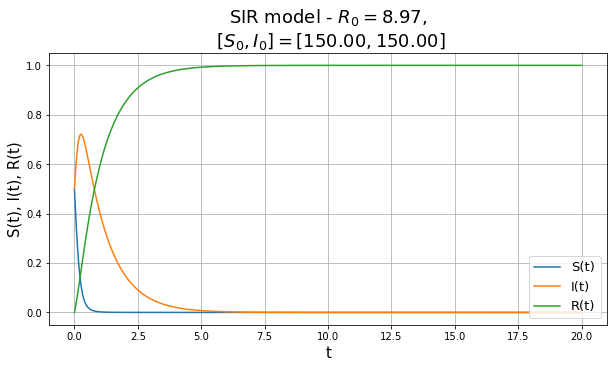

6.917793780551582e-07


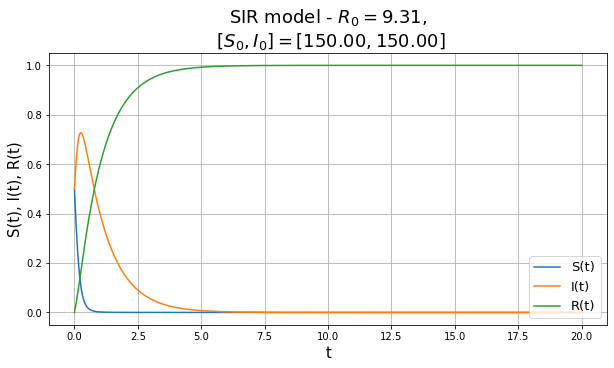

6.857914515615728e-07


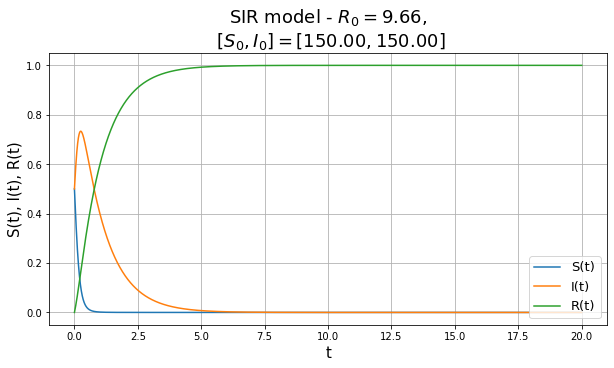

6.839249534572732e-07


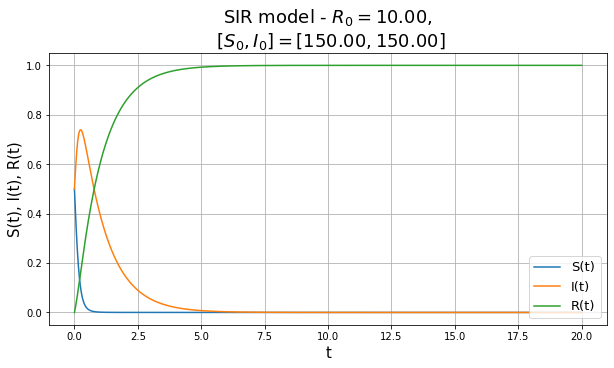

6.780989840038383e-07


In [10]:

#in time
#Parameters

final_susceptible= []
final_infected= []
final_recovered= []


R0_range = np.linspace(0,10,30)
for i in R0_range:
    n = 300
    R0 = i
    gamma = 1
    beta = gamma*R0
    args = (beta, gamma, n)

    # Initial condition S0, I0
    ab0 = np.array([.5, .5])*n #relate this behaviour as R0 changes to the phase portrait

    # Solve
    t = np.linspace(0, 20, 100000)
    ab = scipy.integrate.odeint(sir_phase_portr, ab0, t, args=args)
    plt.figure(figsize=[10,5])
    plt.plot(t, ab/n)
    plt.plot(t, 1-(ab[:,0]/n+ab[:,1]/n))#R
    plt.title("SIR model - $R_{0} = %.2f$,\n $[S_{0},I_{0}]=[%.2f,%.2f]$" %(R0,ab0[0],ab0[1]),fontsize=18)
    plt.xlabel('t',fontsize=15)
    plt.ylabel('S(t), I(t), R(t)',fontsize=15)
    plt.grid()
    plt.legend(('S(t)','I(t)','R(t)'),fontsize=13,loc=4)
    plt.show()
    print(ab[-1,1]) #final infected fraction
    final_susceptible.append(ab[-1,0])
    final_infected.append(ab[-1,1])
    final_recovered.append(1-ab[-1,0]-ab[-1,1])

    

array([1.00000002e+00, 1.58076940e+03])

In [124]:
consistency_s1 = []
consistency_s95 = []
consistency_s8 = []
consistency_s7 = []

R0_range = np.linspace(0,5,1000)

s0 = 1
from scipy.optimize import fsolve
for i in R0_range:
    def func(x):
        return 1-x-s0* np.exp(np.multiply(-x,i))
    x0 = fsolve(func, 1)
    consistency_s1.append(1-s0* np.exp(np.multiply(-x0,i))) #I = 1-R-S


s0 = .95
from scipy.optimize import fsolve
for i in R0_range:
    def func(x):
        return 1-x-s0* np.exp(np.multiply(-x,i))
    x0 = fsolve(func, 1)
    consistency_s95.append(1-s0* np.exp(np.multiply(-x0,i))) #I = 1-R-S

s0 = .8
from scipy.optimize import fsolve
for i in R0_range:
    def func(x):
        return 1-x-s0* np.exp(np.multiply(-x,i))
    x0 = fsolve(func, 1)
    consistency_s8.append(1-s0* np.exp(np.multiply(-x0,i))) #I = 1-R-S

s0 = .7
from scipy.optimize import fsolve
for i in R0_range:
    def func(x):
        return 1-x-s0* np.exp(np.multiply(-x,i))
    x0 = fsolve(func, 1)
    consistency_s7.append(1-s0* np.exp(np.multiply(-x0,i))) #I = 1-R-S


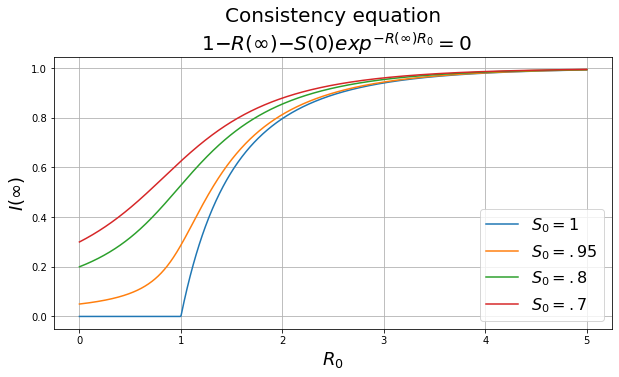

In [125]:
plt.figure(figsize=[10,5])
plt.title("Consistency equation\n $1 − R(\\infty) − S(0)exp^{−R(\\infty) R_{0}} = 0$",fontsize=20)
plt.grid()
plt.plot(R0_range,consistency_s1,label="$S_{0}=1$")
plt.plot(R0_range,consistency_s95,label="$S_{0}=.95$")
plt.plot(R0_range,consistency_s8,label="$S_{0}=.8$")
plt.plot(R0_range,consistency_s7,label="$S_{0}=.7$")
plt.ylabel("$I(\\infty)$",fontsize=18,rotation=90)
plt.xlabel("$R_{0}$",fontsize=18)
plt.legend(fontsize=16)
